In [1]:
import tobac
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

%matplotlib inline

There is also a utility to create 3d-data:

In [2]:
data = tobac.testing.make_sample_data_3D_3blobs()
data

<xarray.DataArray 'w' (time: 25, z: 20, y: 200, x: 100)>
[10000000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-01T12:48:00
  * z          (z) float64 0.0 1e+03 2e+03 3e+03 ... 1.7e+04 1.8e+04 1.9e+04
  * y          (y) float64 0.0 1e+03 2e+03 3e+03 ... 1.97e+05 1.98e+05 1.99e+05
  * x          (x) float64 0.0 1e+03 2e+03 3e+03 ... 9.7e+04 9.8e+04 9.9e+04
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    units:    m s-1

If we want to have a look at this with imshow, we now need to specify a t- and a z-index:

**Iris renames coordinates?**

In [3]:
data.to_iris()

W (m s-1),time,geopotential_height,projection_y_coordinate,projection_x_coordinate
Shape,25,20,200,100
Dimension coordinates,,,,
time,x,-,-,-
geopotential_height,-,x,-,-
projection_y_coordinate,-,-,x,-
projection_x_coordinate,-,-,-,x
Auxiliary coordinates,,,,
latitude,-,-,x,x
longitude,-,-,x,x


In [ ]:
t_list = [i for i in range(20)]
z_list = [i for i in range(20)]
for z in z_list:
    fig, ax = plt.subplots(ncols = len(t_list), figsize = (15, 5))
    for n, t in enumerate(t_list):

        ax[n].imshow(data[t, z])
        ax[n].set_xticks([])
        ax[n].set_yticks([])
    plt.show()

## Feature-detection

v#Feature dteetction can only work with 2d-data:

In [4]:
sample_data_max = data.max(dim="z")
dxy, dt = tobac.utils.get_spacings(sample_data_max)

In [5]:
sample_data_max

<xarray.DataArray 'w' (time: 25, y: 200, x: 100)>
array([[[3.67879441e+00, 4.04541885e+00, 4.40431655e+00, ...,
         2.22319774e-16, 9.26766698e-17, 3.82489752e-17],
        [4.04541885e+00, 4.44858066e+00, 4.84324569e+00, ...,
         2.44475908e-16, 1.01912721e-16, 4.20608242e-17],
        [4.40431655e+00, 4.84324569e+00, 5.27292424e+00, ...,
         2.66165093e-16, 1.10954118e-16, 4.57923372e-17],
        ...,
        [7.05722673e-76, 7.76054187e-76, 8.44903438e-76, ...,
         4.26487831e-92, 1.77786579e-92, 7.33750408e-93],
        [1.08226077e-76, 1.19011764e-76, 1.29570139e-76, ...,
         6.54040272e-93, 2.72644549e-93, 1.12524270e-93],
        [1.64318635e-77, 1.80694442e-77, 1.96725123e-77, ...,
         9.93023193e-94, 4.13953654e-94, 1.70844540e-94]],

       [[2.00505821e+00, 2.28570176e+00, 2.57969995e+00, ...,
         3.98066738e-15, 1.72021535e-15, 7.35981341e-16],
        [2.24223490e+00, 2.55607555e+00, 2.88485054e+00, ...,
         4.45153726e-15, 1.92369822e-15, 8.23039971e-16],
        [2.48251732e+00, 2.82998976e+00, 3.19399694e+00, ...,
         4.92857297e-15, 2.12984560e-15, 9.11238594e-16],
...
        [3.19169897e-66, 8.03296178e-66, 2.00164266e-65, ...,
         1.46585174e-47, 1.39855067e-47, 1.32106267e-47],
        [7.20329399e-67, 1.81294624e-66, 4.51747520e-66, ...,
         3.30825730e-48, 3.15636660e-48, 2.98148517e-48],
        [1.60952385e-67, 4.05089708e-67, 1.00939713e-66, ...,
         7.39206147e-49, 7.05267269e-49, 6.66191279e-49]],

       [[2.22026595e-01, 2.85172190e-01, 3.62632227e-01, ...,
         3.16831506e-05, 3.13365241e-05, 3.06853082e-05],
        [2.58629665e-01, 3.32185375e-01, 4.22415392e-01, ...,
         5.21427221e-05, 5.15722700e-05, 5.05005327e-05],
        [2.98269420e-01, 3.83098897e-01, 4.87158324e-01, ...,
         8.49603208e-05, 8.40308495e-05, 8.22845874e-05],
        ...,
        [1.26274998e-66, 3.29461899e-66, 8.51040787e-66, ...,
         1.90520073e-46, 1.88435836e-46, 1.84519944e-46],
        [2.89816040e-67, 7.56154280e-67, 1.95324029e-66, ...,
         4.37266413e-47, 4.32482840e-47, 4.23495399e-47],
        [6.58543728e-68, 1.71819612e-67, 4.43831431e-67, ...,
         9.93593076e-48, 9.82723445e-48, 9.62301434e-48]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-01T12:48:00
  * y          (y) float64 0.0 1e+03 2e+03 3e+03 ... 1.97e+05 1.98e+05 1.99e+05
  * x          (x) float64 0.0 1e+03 2e+03 3e+03 ... 9.7e+04 9.8e+04 9.9e+04
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...

In [6]:
%%capture
thresholds = 0.05
features = tobac.themes.tobac_v1.feature_detection_multithreshold(sample_data_max, dxy, 9)

Has data 3 dim for each tiemstep?

In [8]:
for i, field_i in zip([1], data.to_iris().slices_over("time")):
    print(field_i.ndim)

3


What are the vertical ccordinates possible?

In [9]:
for i, field_i in zip([1], data.to_iris().slices_over("time")):
    print([coord.name() for coord in field_i.coords()])

['geopotential_height', 'projection_y_coordinate', 'projection_x_coordinate', 'time', 'latitude', 'longitude']


## Segmentation

### vertical_coord : 
{'auto', 'z', 'model_level_number', 'altitude',
                      'geopotential_height'}, optional
        Name of the vertical coordinate for use in 3D segmentation case

In [10]:
%%capture
mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=thresholds, vertical_coord="geopotential_height")

In [11]:
features_mask_1

<xarray.Dataset>
Dimensions:                  (index: 30)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 6 ... 24 25 26 27 28 29
Data variables: (12/14)
    frame                    (index) int64 0 1 2 3 4 5 6 ... 22 22 23 23 24 24
    idx                      (index) int64 1 1 1 1 1 1 1 1 1 ... 1 2 1 2 1 2 1 2
    hdim_1                   (index) float64 10.0 11.71 13.2 ... 15.78 50.27
    hdim_2                   (index) float64 10.0 13.66 17.11 ... 25.55 95.97
    num                      (index) int64 69 65 65 66 65 ... 66 500 65 504 59
    threshold_value          (index) int64 9 9 9 9 9 9 9 9 9 ... 9 9 9 9 9 9 9 9
    ...                       ...
    timestr                  (index) object '2000-01-01 12:00:00' ... '2000-0...
    projection_y_coordinate  (index) float64 1e+04 1.171e+04 ... 5.027e+04
    projection_x_coordinate  (index) float64 1e+04 1.366e+04 ... 9.597e+04
    latitude                 (index) object 24.1 24.14 24.17 ... 24.26 24.96
    longitude                (index) object 150.1 150.1 150.1 ... 150.2 150.5
    ncells                   (index) int64 26187 30016 33772 ... 28738 28738

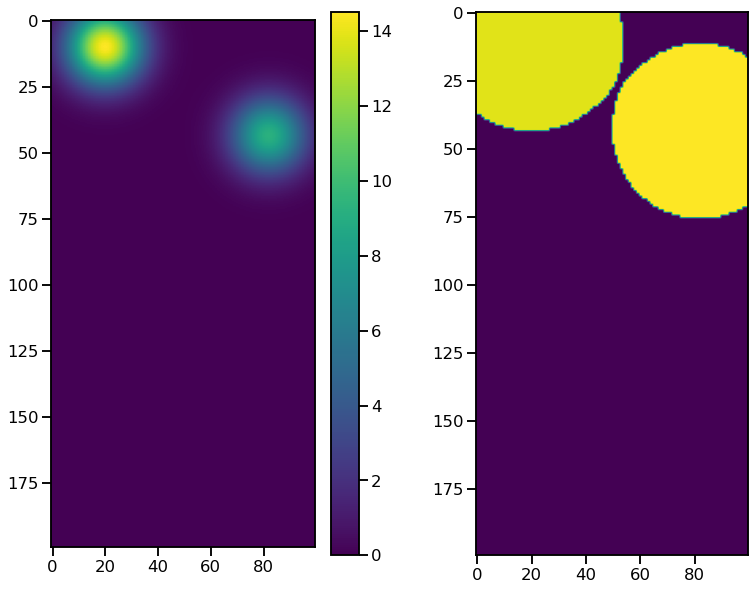

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (13, 10))

time = 20
z = 2

cs = ax1.imshow(data[time, z])
plt.colorbar(cs, ax = ax1)

ax2.imshow(mask_1[time, z])

In [13]:
mask_1.max()

<xarray.DataArray 'segmentation_mask' ()>
array(30, dtype=int32)

In [14]:
data[0, 19].max()

<xarray.DataArray 'w' ()>
array(0.11108997)
Coordinates:
    time     datetime64[ns] 2000-01-01T12:00:00
    z        float64 1.9e+04